# Setup & Data Import

In [1]:
# !pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
btc_ticker = yf.Ticker('BTC-USD')
btc = btc_ticker.history(period="max")
btc = btc.drop(columns=['Dividends', 'Stock Splits'])

In [4]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,31028679593
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,42326789564
2022-08-27,20262.480469,20340.775391,19890.523438,20041.738281,30116729776


# Data Preparation

In [5]:
monthly_close = btc.groupby(btc.index.month)['Close'].tail(1)

In [6]:
btc.resample('M', origin='end').max().tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,67549.734375,68789.625000,66382.062500,67566.828125,48730828378
2021-12-31,57217.371094,59041.683594,56553.082031,57229.828125,61385677469
2022-01-31,47680.925781,47881.406250,46856.937500,47686.812500,84196607520
2022-02-28,44578.277344,45661.171875,43456.691406,44575.203125,46383802093
2022-03-31,47456.898438,48086.835938,47100.437500,47465.730469,39616916192
2022-04-30,46624.507812,47313.476562,45782.511719,46622.675781,39393395788
2022-05-31,39695.746094,39902.949219,38156.562500,39698.371094,70388855818
2022-06-30,31792.554688,31957.285156,30020.265625,31370.671875,68204556440
2022-07-31,23845.212891,24572.580078,23580.507812,23843.886719,49899834488


In [7]:
month_close_df = btc.copy()[btc.index.is_month_end]
month_close_df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

month_close_df.rename(columns={'Close':'month_close'}, inplace=True)
# month_close_df = pd.DataFrame(data=month_close_df['Close'], columns=['Month_Close'])

# .tail(10)


month_close_df

,month_close
Date,
2014-09-30,386.944000
2014-10-31,338.321014
2014-11-30,378.046997
2014-12-31,320.192993
2015-01-31,217.464005
...,...
2022-03-31,45538.675781
2022-04-30,37714.875000
2022-05-31,31792.310547


In [9]:
btc_month_mean = btc.resample('M').mean()
btc_month_mean.rename(columns={'Open':'month_ave_open', 'High':'month_ave_high', 'Low':'month_ave_low', 'Close':'month_ave_close', 'Volume':'month_ave_volume'}, inplace=True)
btc_month_mean.head(15)


,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume
Date,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07
2015-03-31,269.278419,274.850999,263.134162,269.042259,3.093865e+07
2015-04-30,235.708668,238.957098,231.734033,235.491534,2.241129e+07
2015-05-31,237.161806,239.563161,234.939388,236.997001,1.832654e+07


In [11]:
btc_month_mean['month_ave_close_shift'] = btc_month_mean['month_ave_close'].shift(-1)
btc_month_mean.dropna(inplace=True)
btc_month_mean

,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,2.934864e+07,364.148873
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07,366.099799
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645
...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482


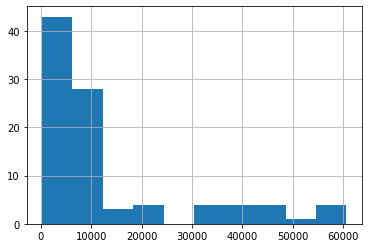

In [12]:
btc_month_mean['month_ave_close_shift'].hist()

In [13]:
btc_month_mean['month_ave_close_shift_diff'] = btc_month_mean['month_ave_close_shift'].diff()
btc_month_mean.dropna(inplace=True)

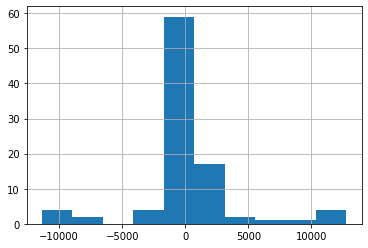

In [14]:
btc_month_mean['month_ave_close_shift_diff'].hist()

Dickey–Fuller test: p=0.094149


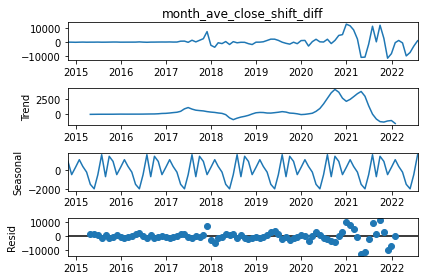

In [15]:
seasonal_decompose(btc_month_mean['month_ave_close_shift_diff']).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month_mean['month_ave_close_shift_diff'])[1])

In [16]:
btc_month_mean


,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift,month_ave_close_shift_diff
Date,,,,,,,
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07,366.099799,1.950926
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871,-24.831928
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547,-92.485323
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645,-14.628903
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07,269.042259,34.888614
...,...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661,-530.917864
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217,-9729.214445
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482,-7322.419735


In [17]:
btc_month_mean['month_ave_close_shift_diff_percent'] = None

for i in range(1, len(btc_month_mean)):
  btc_month_mean['month_ave_close_shift_diff_percent'][i] = \
  (btc_month_mean['month_ave_close_shift'][i] - btc_month_mean['month_ave_close_shift'][i-1]) / btc_month_mean['month_ave_close_shift'][i-1]

btc_month_mean.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
btc_month_mean

,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift,month_ave_close_shift_diff,month_ave_close_shift_diff_percent
Date,,,,,,,,
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871,-24.831928,-0.067828
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547,-92.485323,-0.271005
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645,-14.628903,-0.058802
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07,269.042259,34.888614,0.148999
2015-03-31,269.278419,274.850999,263.134162,269.042259,3.093865e+07,235.491534,-33.550725,-0.124704
...,...,...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661,-530.917864,-0.012651
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217,-9729.214445,-0.234805
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482,-7322.419735,-0.230947


!! Stationary

Dickey–Fuller test: p=0.000000


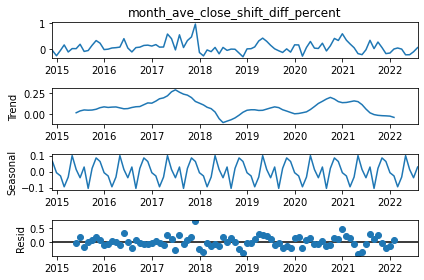

In [19]:
seasonal_decompose(btc_month_mean['month_ave_close_shift_diff_percent']).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month_mean['month_ave_close_shift_diff_percent'])[1])

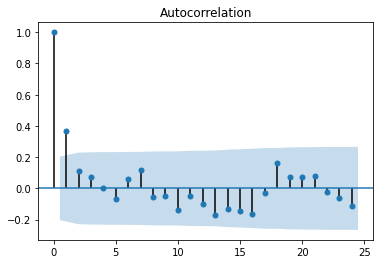

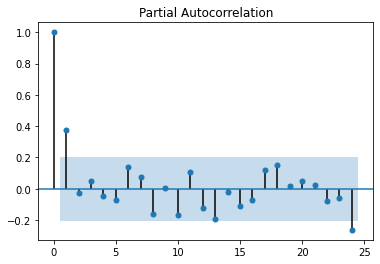

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(btc_month_mean['month_ave_close_shift_diff_percent'], lags=24);
plot_pacf(btc_month_mean['month_ave_close_shift_diff_percent'], lags=24);

## Train/Test Split + Scale Data

In [21]:
train_test_split = int(btc_month_mean.shape[0] * 0.75)
train = btc_month_mean.copy().iloc[:train_test_split]
test = btc_month_mean.copy().iloc[train_test_split:]
train.shape, test.shape

((69, 8), (24, 8))

In [22]:
train.columns

Index(['month_ave_open', 'month_ave_high', 'month_ave_low', 'month_ave_close',
       'month_ave_volume', 'month_ave_close_shift',
       'month_ave_close_shift_diff', 'month_ave_close_shift_diff_percent'],
      dtype='object')

In [23]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

#hide warnings
train_scaled = pd.DataFrame()
test_scaled = pd.DataFrame()

train_scaled[['month_ave_open', 'month_ave_high', 'month_ave_low', 'month_ave_volume', 'month_ave_close', 'month_ave_close_shift_diff_percent']] = \
  scaler.fit_transform(train[['month_ave_open', 'month_ave_high', 'month_ave_low', 'month_ave_volume', 'month_ave_close', 'month_ave_close_shift_diff_percent']])
test_scaled[['month_ave_open', 'month_ave_high', 'month_ave_low', 'month_ave_volume', 'month_ave_close', 'month_ave_close_shift_diff_percent']] = \
  scaler.transform(test[['month_ave_open', 'month_ave_high', 'month_ave_low', 'month_ave_volume', 'month_ave_close', 'month_ave_close_shift_diff_percent']])

train_scaled.index = train.index
test_scaled.index = test.index

display(train_scaled.head())
display(test_scaled.tail())

,month_ave_open,month_ave_high,month_ave_low,month_ave_volume,month_ave_close,month_ave_close_shift_diff_percent
Date,,,,,,
2014-11-30,0.008836,0.008840,0.009269,0.000100,0.008798,0.192411
2014-12-31,0.007379,0.007006,0.007789,0.000000,0.007149,0.032382
2015-01-31,0.001270,0.001562,0.000911,0.000423,0.001008,0.199520
2015-02-28,0.000000,0.000223,0.000000,0.000182,0.000037,0.363191
2015-03-31,0.002440,0.002413,0.002532,0.000315,0.002354,0.147613


,month_ave_open,month_ave_high,month_ave_low,month_ave_volume,month_ave_close,month_ave_close_shift_diff_percent
Date,,,,,,
2022-03-31,2.787794,2.689440,2.927655,0.643769,2.770967,0.235870
2022-04-30,2.774778,2.661495,2.905062,0.664579,2.735716,0.060894
2022-05-31,2.119331,2.048247,2.196297,0.856768,2.089714,0.063933
2022-06-30,1.643011,1.580276,1.684191,0.739741,1.603520,0.153954
2022-07-31,1.418240,1.376894,1.484209,0.718689,1.414655,0.281659


In [24]:
X_train = train_scaled.copy().drop(columns=['month_ave_close_shift_diff_percent'])
y_train = train_scaled.copy()['month_ave_close_shift_diff_percent']

X_test = test_scaled.copy().drop(columns=['month_ave_close_shift_diff_percent'])
y_test = test_scaled.copy()['month_ave_close_shift_diff_percent']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((69, 5), (69,), (24, 5), (24,))

In [25]:
X_train

,month_ave_open,month_ave_high,month_ave_low,month_ave_volume,month_ave_close
Date,,,,,
2014-11-30,0.008836,0.008840,0.009269,0.000100,0.008798
2014-12-31,0.007379,0.007006,0.007789,0.000000,0.007149
2015-01-31,0.001270,0.001562,0.000911,0.000423,0.001008
2015-02-28,0.000000,0.000223,0.000000,0.000182,0.000037
2015-03-31,0.002440,0.002413,0.002532,0.000315,0.002354
...,...,...,...,...,...
2020-03-31,0.449104,0.439218,0.457612,1.000000,0.440712
2020-04-30,0.462964,0.449931,0.488099,0.925748,0.464181
2020-05-31,0.602644,0.582645,0.631530,0.996842,0.599545


# LinearRegression fit/predict

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train) 
lr.score(X_train, y_train) 

0.4117409279168599

In [27]:
X_test_predict = lr.predict(X_test)

X_test_predict_df = pd.DataFrame(X_test_predict, index=X_test.index, columns=['Y_PRED'])
X_test_predict_df

,Y_PRED
Date,
2020-08-31,0.261447
2020-09-30,0.128752
2020-10-31,0.344314
2020-11-30,0.384701
2020-12-31,0.557461
2021-01-31,-0.255088
2021-02-28,0.634938
2021-03-31,0.410557
2021-04-30,-0.296321


## Reassemble data frame with prediction

In [28]:
predict_df = test.merge(X_test_predict_df, how='left', on='Date')
predict_df

,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift,month_ave_close_shift_diff,month_ave_close_shift_diff_percent,Y_PRED
Date,,,,,,,,,
2020-08-31,11639.097215,11827.761278,11453.378749,11652.394185,2.285087e+10,10660.276855,-992.117329,-0.085143,0.261447
2020-09-30,10689.700163,10844.910254,10470.011263,10660.276855,3.586498e+10,11886.978201,1226.701345,0.115072,0.128752
2020-10-31,11791.307491,12018.847719,11648.076833,11886.978201,3.389918e+10,16645.757422,4758.779221,0.400335,0.344314
2020-11-30,16450.121647,16945.980208,16064.074740,16645.757422,3.643816e+10,21983.137097,5337.379675,0.320645,0.384701
2020-12-31,21680.540827,22354.685610,21229.362021,21983.137097,3.910515e+10,34761.649950,12778.512853,0.581287,0.557461
2021-01-31,34652.961694,36206.557082,32705.655998,34761.649950,6.946688e+10,46306.798968,11545.149018,0.332123,-0.255088
2021-02-28,45874.967215,47710.414621,44197.377302,46306.798968,8.096975e+10,54998.008695,8691.209727,0.187688,0.634938
2021-03-31,54544.678175,56250.979083,52964.134703,54998.008695,5.423175e+10,57206.720052,2208.711358,0.04016,0.410557
2021-04-30,57251.256250,58557.342057,55604.271094,57206.720052,6.148273e+10,46443.286668,-10763.433384,-0.18815,-0.296321


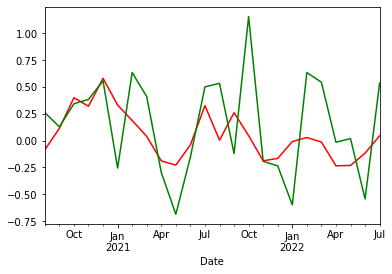

In [29]:
predict_df['month_ave_close_shift_diff_percent'].plot(c='red')
predict_df['Y_PRED'].plot(c='green')

In [30]:
#merge actual close with the dataframe
predict_df = predict_df.merge(month_close_df, how='left', left_index=True, right_index=True)
predict_df


,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift,month_ave_close_shift_diff,month_ave_close_shift_diff_percent,Y_PRED,month_close
Date,,,,,,,,,,
2020-08-31,11639.097215,11827.761278,11453.378749,11652.394185,2.285087e+10,10660.276855,-992.117329,-0.085143,0.261447,11680.820312
2020-09-30,10689.700163,10844.910254,10470.011263,10660.276855,3.586498e+10,11886.978201,1226.701345,0.115072,0.128752,10784.491211
2020-10-31,11791.307491,12018.847719,11648.076833,11886.978201,3.389918e+10,16645.757422,4758.779221,0.400335,0.344314,13780.995117
2020-11-30,16450.121647,16945.980208,16064.074740,16645.757422,3.643816e+10,21983.137097,5337.379675,0.320645,0.384701,19625.835938
2020-12-31,21680.540827,22354.685610,21229.362021,21983.137097,3.910515e+10,34761.649950,12778.512853,0.581287,0.557461,29001.720703
2021-01-31,34652.961694,36206.557082,32705.655998,34761.649950,6.946688e+10,46306.798968,11545.149018,0.332123,-0.255088,33114.359375
2021-02-28,45874.967215,47710.414621,44197.377302,46306.798968,8.096975e+10,54998.008695,8691.209727,0.187688,0.634938,45137.769531
2021-03-31,54544.678175,56250.979083,52964.134703,54998.008695,5.423175e+10,57206.720052,2208.711358,0.04016,0.410557,58918.832031
2021-04-30,57251.256250,58557.342057,55604.271094,57206.720052,6.148273e+10,46443.286668,-10763.433384,-0.18815,-0.296321,57750.175781


In [31]:
# predict_df['gain_loss'] = predict_df['Close_shift'] - predict_df['Close']
# predict_df

predict_df['gain_loss'] = None
for i in range(1, len(predict_df)):
  predict_df['gain_loss'][i] = predict_df['month_close'][i] - predict_df['month_close'][i-1]

predict_df.dropna(inplace=True)
predict_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month_ave_open,month_ave_high,month_ave_low,month_ave_close,month_ave_volume,month_ave_close_shift,month_ave_close_shift_diff,month_ave_close_shift_diff_percent,Y_PRED,month_close,gain_loss
Date,,,,,,,,,,,
2020-09-30,10689.700163,10844.910254,10470.011263,10660.276855,3.586498e+10,11886.978201,1226.701345,0.115072,0.128752,10784.491211,-896.329102
2020-10-31,11791.307491,12018.847719,11648.076833,11886.978201,3.389918e+10,16645.757422,4758.779221,0.400335,0.344314,13780.995117,2996.503906
2020-11-30,16450.121647,16945.980208,16064.074740,16645.757422,3.643816e+10,21983.137097,5337.379675,0.320645,0.384701,19625.835938,5844.84082
2020-12-31,21680.540827,22354.685610,21229.362021,21983.137097,3.910515e+10,34761.649950,12778.512853,0.581287,0.557461,29001.720703,9375.884766
2021-01-31,34652.961694,36206.557082,32705.655998,34761.649950,6.946688e+10,46306.798968,11545.149018,0.332123,-0.255088,33114.359375,4112.638672
2021-02-28,45874.967215,47710.414621,44197.377302,46306.798968,8.096975e+10,54998.008695,8691.209727,0.187688,0.634938,45137.769531,12023.410156
2021-03-31,54544.678175,56250.979083,52964.134703,54998.008695,5.423175e+10,57206.720052,2208.711358,0.04016,0.410557,58918.832031,13781.0625
2021-04-30,57251.256250,58557.342057,55604.271094,57206.720052,6.148273e+10,46443.286668,-10763.433384,-0.18815,-0.296321,57750.175781,-1168.65625
2021-05-31,47105.828503,48775.041835,44434.530620,46443.286668,6.376108e+10,35845.154687,-10598.131981,-0.228195,-0.686474,37332.855469,-20417.320312


## Evaluate strategy

### if Y_PRED > 0

In [32]:
def calc_gain_loss(df, threshold):
  gain_loss = []
  for index, row in df.iterrows():
    if row['Y_PRED'] > threshold:
      print(f'{index}::{row["Y_PRED"]}')

      # gain_loss.append(row['Close_shift'] - row['Close'])
      gain_loss.append(row['gain_loss'])
      
  display(gain_loss)
  print(f'GAIN/LOSS: {sum(gain_loss)}')  

In [33]:
calc_gain_loss(predict_df, 0.0)

2020-09-30 00:00:00::0.1287521995512778
2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-05-31 00:00:00::0.019161448935245518
2022-07-31 00:00:00::0.5370193779437559


[-896.3291015625,
 2996.50390625,
 5844.8408203125,
 9375.884765625,
 12023.41015625,
 13781.0625,
 6585.359375,
 5540.4921875,
 17528.0625,
 4710.109375,
 2345.44140625,
 -5922.564453125,
 3552.169921875]

GAIN/LOSS: 77464.443359375


### if Y_PRED > .1


In [34]:
calc_gain_loss(predict_df, 0.1)

2020-09-30 00:00:00::0.1287521995512778
2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-07-31 00:00:00::0.5370193779437559


[-896.3291015625,
 2996.50390625,
 5844.8408203125,
 9375.884765625,
 12023.41015625,
 13781.0625,
 6585.359375,
 5540.4921875,
 17528.0625,
 4710.109375,
 2345.44140625,
 3552.169921875]

GAIN/LOSS: 83387.0078125


### if Y_PRED > .20

In [35]:
calc_gain_loss(predict_df, 0.2)

2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-07-31 00:00:00::0.5370193779437559


[2996.50390625,
 5844.8408203125,
 9375.884765625,
 12023.41015625,
 13781.0625,
 6585.359375,
 5540.4921875,
 17528.0625,
 4710.109375,
 2345.44140625,
 3552.169921875]

GAIN/LOSS: 84283.3369140625


In [36]:
predict_df.shape

(23, 11)

In [37]:
#find residuals and P values
from statsmodels.api import OLS

ols = OLS(y_train, X_train).fit()

In [38]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     month_ave_close_shift_diff_percent   R-squared (uncentered):                   0.504
Model:                                            OLS   Adj. R-squared (uncentered):              0.465
Method:                                 Least Squares   F-statistic:                              13.00
Date:                                Mon, 29 Aug 2022   Prob (F-statistic):                    9.74e-09
Time:                                        10:47:23   Log-Likelihood:                        -0.53782
No. Observations:                                  69   AIC:                                      11.08
Df Residuals:                                      64   BIC:                                      22.25
Df Model:                                           5                                                  
Covariance Type:                            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
month_ave_open     -84.8369     18.871     -4.496      0.000    -122.537     -47.137
month_ave_high      80.7722     27.245      2.965      0.004      26.343     135.201
month_ave_low       61.6918     18.260      3.379      0.001      25.213      98.170
month_ave_volume    -0.2367      0.174     -1.360      0.179      -0.584       0.111
month_ave_close    -57.2867     31.324     -1.829      0.072    -119.863       5.289
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.814
Skew:                          -0.102   Prob(JB):                        0.666
Kurtosis:                       2.509   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

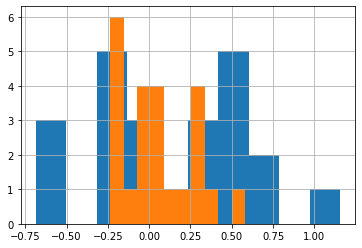

In [39]:
predict_df['Y_PRED'].hist()
predict_df['month_ave_close_shift_diff_percent'].hist()


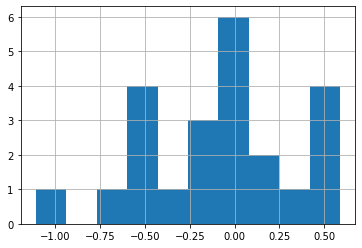

In [40]:
(predict_df['month_ave_close_shift_diff_percent']-predict_df['Y_PRED']).hist()

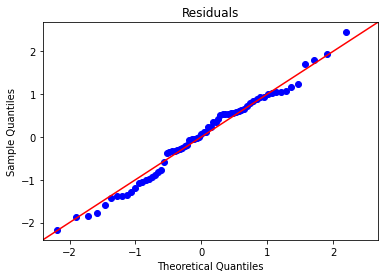

In [41]:
sm.qqplot(ols.resid, fit=True, line='45')
plt.title('Residuals')
plt.show()


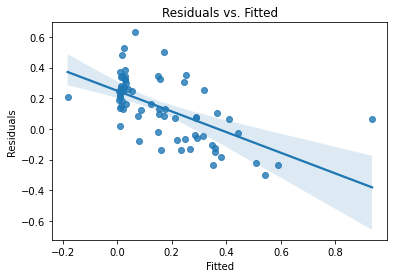

In [42]:
    sns.regplot(x=ols.fittedvalues, y=ols.resid)
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()